# First Sip of Caffe

This is a quick check to make sure we can brew.

---
Before we begin, let's verify [WebSockets](http://en.wikipedia.org/wiki/WebSocket) are working on your system.  To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Ctrl-Enter, or pressing the play button in the toolbar above.  If all goes well, you should see some output returned below the grey cell.  If not, please consult the [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue. *This section courtesy the NVIDIA Caffe introduction.*

In [1]:
print "The answer should be three: " + str(1+2)

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [2]:
!nvidia-smi

Fri Apr 07 15:26:02 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 369.30                 Driver Version: 369.30                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro M6000 24GB  WDDM  | 0000:03:00.0     Off |                  Off |
| 43%   64C    P0    66W / 250W |  19909MiB / 24576MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Quadro M6000 24GB  WDDM  | 0000:04:00.0     Off |                  Off |
| 49%   69C    P0   117W / 250W |  21001MiB / 24576MiB |     78%      Default |
+-------------------------------+----------------------+----------------------+
        

Now load the `caffe` Python module and switch to GPU mode for computation.

In [3]:
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)

# make sure that caffe is in our import path
import sys
sys.path.insert(0, caffe_root + 'python')

# load caffe and switch to the GPU
import caffe
caffe.set_mode_gpu()
caffe.set_device(0)

# import standard array and plotting toolkit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next step is to collect the materials we'll need for our first sip:

1. a pre-trained network for off-the-shelf use
2. the category names to understand the output

In [5]:
# make sure we have the CaffeNet model weights
import os
if os.path.isfile(caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'):
    print 'CaffeNet found.'
else:
    print 'Downloading pre-trained CaffeNet model...'
    !../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

# load ImageNet labels (for understanding the output)
labels_file = caffe_root + 'data/ilsvrc12/synset_words.txt'
if not os.path.exists(labels_file):
    !../data/ilsvrc12/get_ilsvrc_aux.sh
labels = np.loadtxt(labels_file, str, delimiter='\t')

CaffeNet found.


With `caffe` ready, let's load our pre-trained CaffeNet (a variant of the ILSVRC2012-winning AlexNet by Krizhevsky et al.).

In [6]:
# load and run the net
model_def = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # for deployment (in contrast to caffe.TRAIN)

print 'Loaded net.'

Loaded net.


Before checking the net let's define an input pre-processor, `transformer`, to help feed an image into the net.

In [8]:
# configure input pre-processing
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
print mu.shape
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print mu.shape
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
print net.blobs['data'].data.shape
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR
print 'Configured input.'

(3L, 256L, 256L)
(3L,)
(10L, 3L, 227L, 227L)
Configured input.


Time for an image:

(323L, 481L, 3L)
(3L, 227L, 227L)


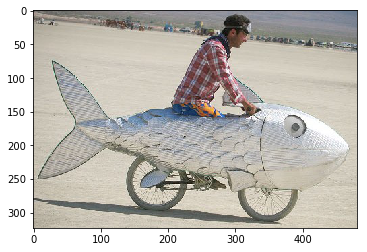

In [20]:
# download an image
image = caffe.io.load_image(caffe_root + 'examples/images/fish-bike.jpg') #coffee.jpg')
print image.shape
transformed_image = transformer.preprocess('data', image)
print transformed_image.shape
plt.imshow(image)
#plt.imshow(np.transpose(transformed_image, (1,2,0)))

What a fine cup of coffee. Let's classify!

In [21]:
print net.blobs['data'].data.shape
net.blobs['data'].data[...] = transformed_image
print net.blobs['data'].data.shape
net.forward()
print net.blobs['prob'].data.shape
for i in range(10):
    output_prob = net.blobs['prob'].data[i]
    print 'What does the net say?\n', labels[output_prob.argmax()]

(10L, 3L, 227L, 227L)
(10L, 3L, 227L, 227L)
(10L, 1000L)
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe
What does the net say?
n04120489 running shoe


Happy brewing!

In [33]:
a = np.arange(15).reshape(3,5)
b = np.array([-1, -2, -3, -4, -5])
a[...] = b
a


array([[-1, -2, -3, -4, -5],
       [-1, -2, -3, -4, -5],
       [-1, -2, -3, -4, -5]])